# Simple Moving Average Stock Trading Strategy

Based on [Simple Moving Average Stock Trading Strategy Using Python](https://www.youtube.com/watch?v=PUk5E8G1r44) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

## Load Bitcoin data

In [3]:
df = pd.read_csv('HDFC.csv')

Show the data

In [4]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-08-31,621.060490,633.785134,619.347557,631.925354,5580682,0.0,0.0
1,2016-09-01,630.359306,631.338125,624.192760,628.254822,2612338,0.0,0.0
2,2016-09-02,629.135778,630.848711,627.006859,628.940002,1977594,0.0,0.0
3,2016-09-06,631.362664,638.140973,631.362664,636.428040,2754442,0.0,0.0
4,2016-09-07,636.721643,638.679280,627.961202,629.747559,2008222,0.0,0.0
...,...,...,...,...,...,...,...,...
820,2020-01-03,1282.199951,1285.000000,1263.599976,1268.400024,5427775,0.0,0.0
821,2020-01-06,1260.000000,1261.800049,1236.000000,1240.949951,5445093,0.0,0.0
822,2020-01-07,1258.900024,1271.449951,1252.250000,1260.599976,7362247,0.0,0.0
823,2020-01-08,1246.949951,1262.150024,1240.050049,1257.300049,5666055,0.0,0.0


Visually show the close price

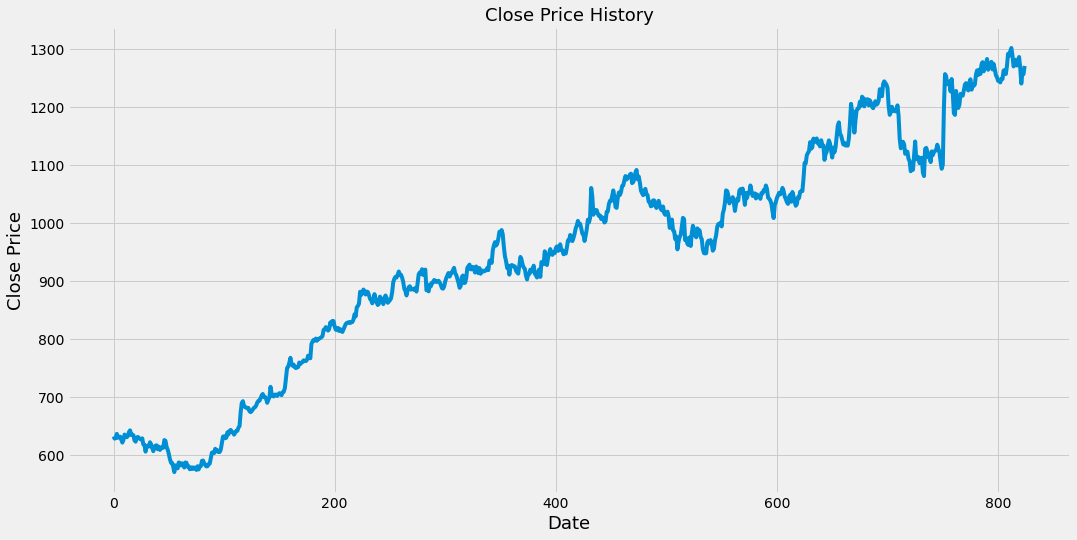

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

Create a function to get the simple movinga average (SMA)

In [6]:
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

Create new columns to store the 20 day SMA and 50 day SMA

In [7]:
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

Get the buy and sell signals

In [8]:
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Postion'] = df['Signal'].diff()

df['Buy'] = np.where(df['Postion'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Postion'] == -1, df['Close'], np.NAN)

Visually show the close price with the SMAs and Buy & Sell signals

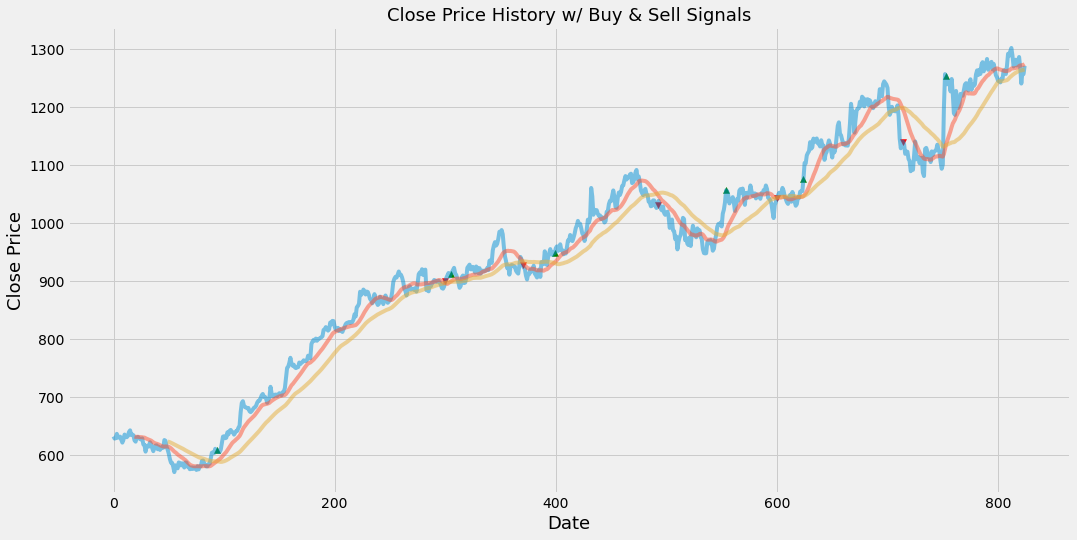

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA20'], alpha=0.5, label='SMA20')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

Create a function to see the dates of each death cross and golden cross within the dataset

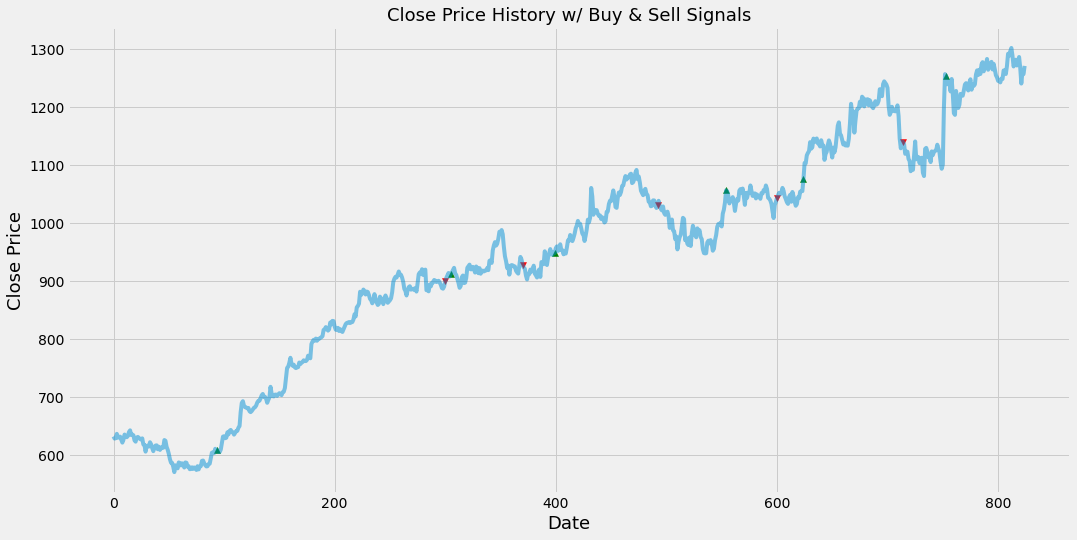

In [10]:
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()       

**THIS IS NOT AN INVESTMENT ADVICE!**